<a href="https://colab.research.google.com/github/fbrinadze/NJIT-Data-Science-Bootcamp/blob/main/Felix_Brinadze_Titanic_Machine_Learning_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning: Final Project

### Predicting Survival on the *Titanic*

The final project is intended to simulate participation in a Kaggle competition. Your challenge is to build the most accurate model for predicting which passangers would survive the sinking of the *Titanic*. The ***Titanic Machine Learning Final Project.ipynb*** Colab notebook provides some guidance for tackling the project and suggests some things to think about as you get started. However, many of the model-building decisions are left up to you. 
**Note**: Use comments in your code and text blocks to explain your decisions and results.

### Build a Pipeline for a Kaggle Competition!

Kaggle was started in 2010 as a platform for machine learning competitions, which aim to identify how best to optimize supervised learning problems. These initiatives offer a two-way benefit. They help companies improve their internal algorithms and they provide prospective data professionals opportunities to prove their worth.

Though Kaggle usually has a singular aim of maximizing a specific metric, the idea of finding the best possible algorithm and furthermore optimizing its hyperparameters is the daily task of a data scientist. Moreover, success in Kaggle can be great for a future resume (since your information is saved on their site).

Obviously, the timeframe for this lesson is not realistic in terms of a typical Kaggle workflow, as competitors spend weeks or even months optimizing every piece of an algorithm they can. However, you can get started with preliminary testing and use these principles to enter your own Kaggle competitions in the future!

# Step 1: Importing Libraries

It is best practice to import all libraries and packages early in the process.

You'll probably want to import Pandas plus some packages from scikit-learn.

| Type | Path | Regression | Classification |
| --- | --- | --- | --- |
| **Linear Models** | `sklearn.linear_model` | `LinearRegression` | `LogisticRegression` |
|  |  |`Ridge` | `RidgeClassifier` |
|  |  |`Lasso` |  |
| **K Nearest Neighbors** | `sklearn.neighbors` | `KNeighborsRegressor` | `KNeighborsClassifier` |
| **Support Vector Machines** | `sklearn.svm.` | `SVR` | `SVC` |
| **Naive Bayes** |  `sklearn.naive_Bayes` |  |`CategoricalNB` (Categorical) |
|  |  |  | `MultinomialNB` (Sentiment Analysis) |
| **Decision Trees** | `sklearn.tree` | `DecisionTreeRegressor` | `DecisionTreeClassifier` |
| **Ensemble - Random Forests** | `sklearn.ensemble` | `RandomForestRegressor` | `RandomForestClassifier`
| **Ensemble - Boosting** | `sklearn.ensemble` | `AdaBoostRegressor` | `AdaBoostClassifier` |
|  | `sklearn.ensemble` | `GradientBoostRegressor` | `GradientBoostClassifier` |



| Type | Path | Package |
| --- | --- | --- |
| Preprocessing | `sklearn.preprocessing` | `StandardScaler` |
| |`sklearn.preprocessing` | `MinMaxScaler` |
| |`sklearn.preprocessing` | `MaxAbsScaler` |
| Model Selection - Splitting| `sklearn.model_selection` | `train_test_split` |
| Model Selection - Grid Search | `sklearn.model_selection` | `GridSearchCV` |
| Model Selection - Scoring | `sklearn.model_selection` | `cross_val_score` |
| Metrics | `sklearn.metrics` | `confusion_matrix` |


**Note**: Use comments in your code and text blocks to explain your decisions and results.




In [ ]:
pip install prettytable

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Step 1
from prettytable import PrettyTable
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from datetime import datetime

#Graphic Libraries
import matplotlib.pyplot as plt
import seaborn as sns

#importing preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder

#Pipelines
from sklearn.pipeline import Pipeline
#importing models
from sklearn.linear_model	import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV


#hyper tuning
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

#Step 2:  Load the `Titanic.csv` Data
You may want to refer back to one of your previous Colab notebooks to copy the Google Import code.

**Note**: Use comments in your code and text blocks to explain your decisions and results.

In [ ]:
#Step 2
from google.colab import files
segmentation = files.upload()

Saving Titanic.csv to Titanic.csv


#Step 3: Split the Data

The next step is to separate the target column from the feature matrix and perform a train/test split. 

*   What is the target and what are the features in the data?
*   Are there any features that you want to drop?
*   Is there any feature engineering that you need to do?

**Note**: Use comments in your code and text blocks to explain your decisions and results.

 

In [ ]:
#Step 3a
titanic = pd.read_csv('Titanic.csv')
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#Step 3b
#data types and columns
print("\tDtypes")
print("------------------------")
print(titanic.dtypes)



	Dtypes
------------------------
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [ ]:
#Descriptive Stats
titanic.describe()
#Potentially create Age Bands

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


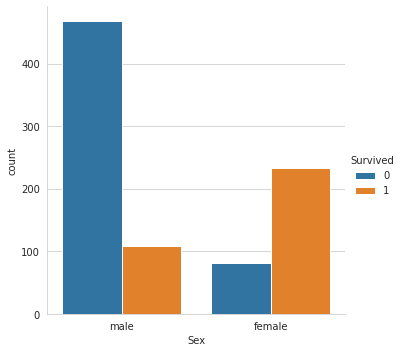

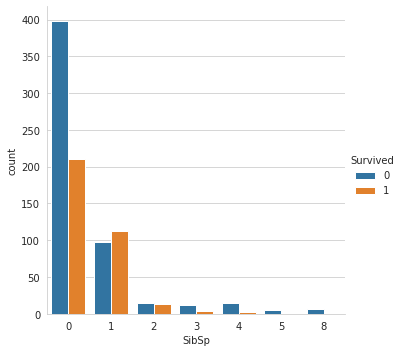

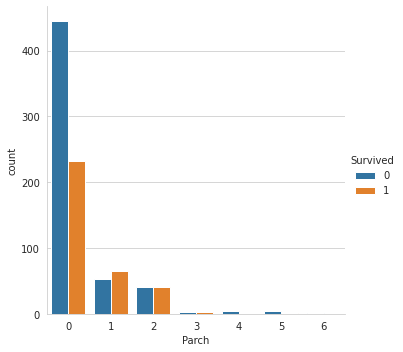

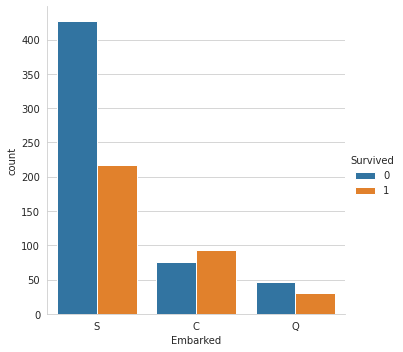

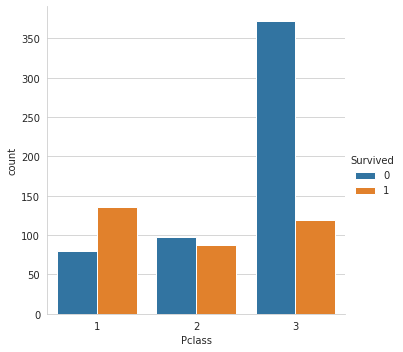

In [ ]:
#Visualizing the Data

sns.catplot(x ="Sex", hue ="Survived",
kind ="count", data = titanic)
#for more females survived vs male

sns.catplot(x ="SibSp", hue ="Survived",
kind ="count", data = titanic)
#looks like more only children survived or people alone

sns.catplot(x ="Parch", hue ="Survived",
kind ="count", data = titanic)

sns.catplot(x ="Embarked", hue ="Survived",
kind ="count", data = titanic)
#more people who embarked on south hampton survived

sns.catplot(x ="Pclass", hue ="Survived",
kind ="count", data = titanic)
#more 1st class followed by 3rd then 2nd survived

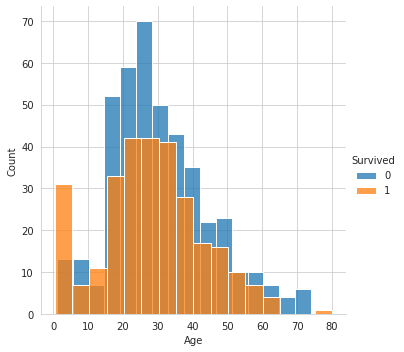

In [ ]:
sns.FacetGrid(titanic, hue="Survived", height=5) \
   .map(sns.histplot, "Age") \
   .add_legend()
plt.show()
#ages 20 - 30 survived the most, followed by people in their 40s.  I had assumed more children survivers.

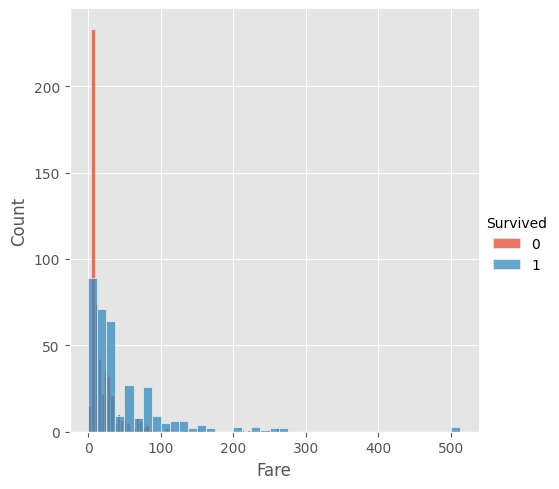

In [ ]:
sns.FacetGrid(titanic, hue="Survived", height=5) \
   .map(sns.histplot, "Fare") \
   .add_legend()
plt.show()
#nothing really interesting here

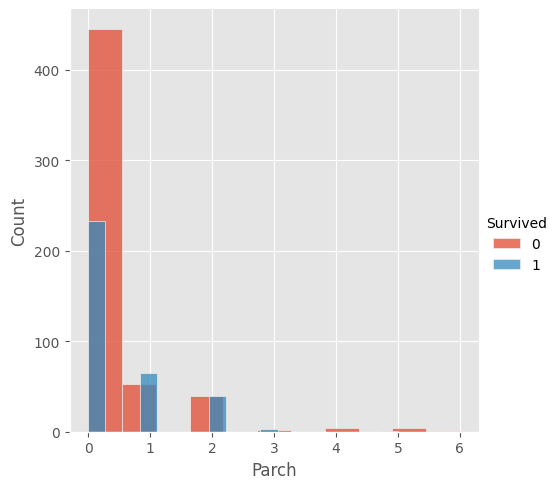

In [ ]:
sns.FacetGrid(titanic, hue="Survived", height=5) \
   .map(sns.histplot, "Parch") \
   .add_legend()
plt.show()

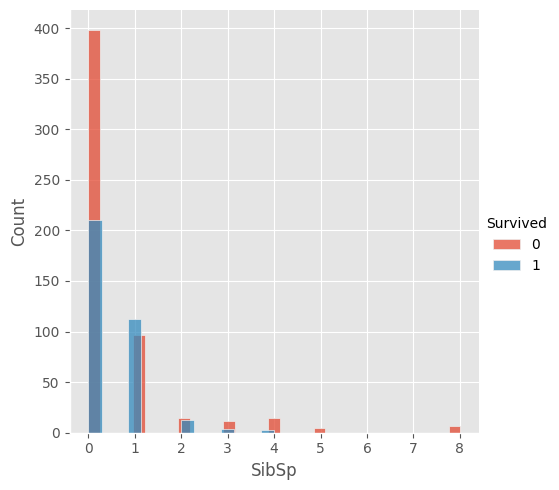

In [ ]:
sns.FacetGrid(titanic, hue="Survived", height=5) \
   .map(sns.histplot, "SibSp") \
   .add_legend()
plt.show()

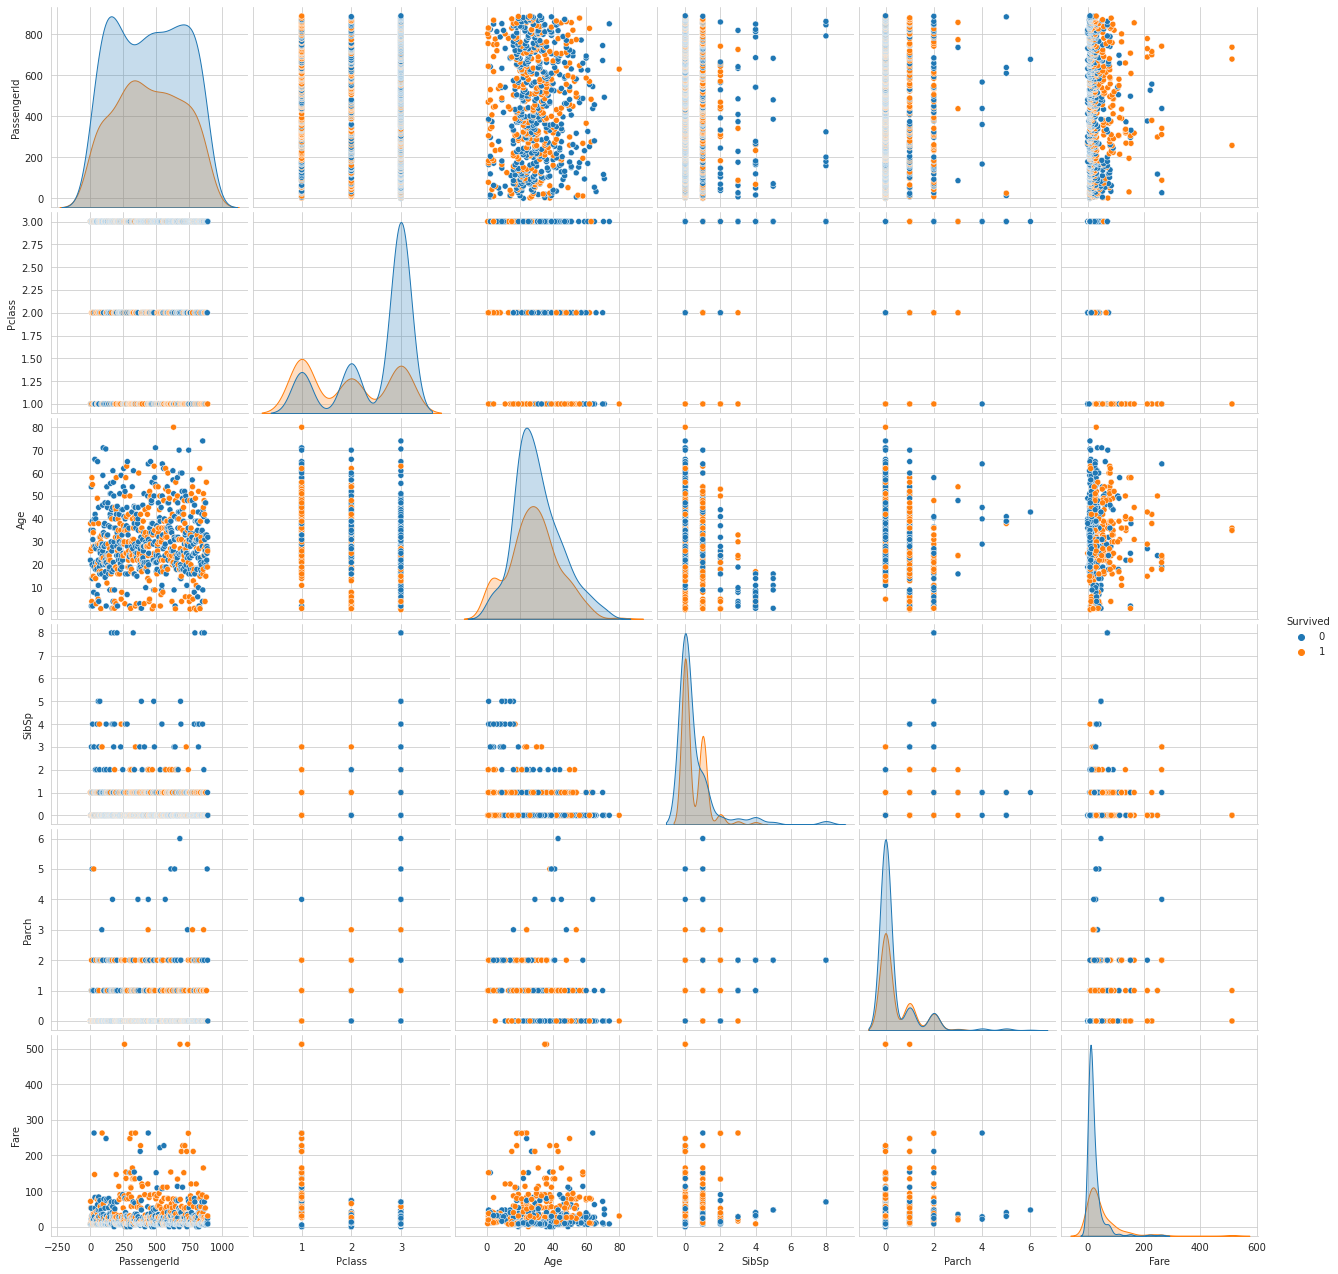

In [ ]:
sns.set_style("whitegrid");
sns.pairplot(titanic, hue="Survived", height=3);
plt.show()

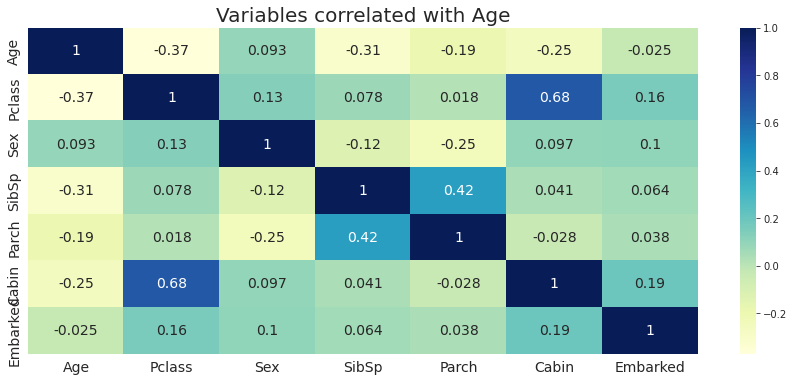

In [ ]:
temp_df = titanic.drop(columns=['Survived', 'Name', 'Ticket', 'Fare', 'PassengerId'])
correlation = temp_df.agg(LabelEncoder().fit_transform)
correlation["Age"] = titanic.Age # Inserting Age in dataframe "toSearch".
correlation = correlation.set_index("Age").reset_index() # Move Age column at index 0.

# Now create the correlation heatmap
fig,ax = plt.subplots(nrows=1, ncols=1, figsize=(15,6))
sns.heatmap(correlation.corr(), cmap ="YlGnBu", annot=True, annot_kws={"size":14}, ax=ax)
ax.set_title("Variables correlated with Age", fontsize = 20)
ax.tick_params(axis = "both", which = "major", labelsize = 14)
ax.tick_params(axis = "both", which = "minor", labelsize = 14)
plt.show()
#as expect cabin and class look correlated.  Will drop since it is correlated with Pclass
#Parch and Sibsp as expected has a somewhat of a correlation and could potentially combine to see results

In [ ]:
#creating a family feature
titanic['Family'] = titanic['SibSp'] + titanic['Parch'] + 1

Going to be interested in the following fields

Y
----------------------
Survived         int64
X
-----------------------
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Embarked        object

#Step 4: Clean and Preprocess the Data

Use the code block below to clean and preprocess your data. Some considerations you may want to think about include the following:  
*  Are there any missing values that need to be imputed?
*  Do you need to encode any categorical features?
*  Do you need to standardize any quantitative features?
 
**Note**: Use comments in your code and text blocks to explain your decisions and results.

 

In [ ]:
#Step 4
#Check for missing values
titanic.isnull().sum() 
#missing 177 age values and 687 cabins and 2 embarked
#Won't use cabin since so many are missing

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Family           0
dtype: int64

In [ ]:
#Step 4b
#filling in missing age with Mean
mean_imputer = SimpleImputer(strategy='mean')
titanic['Age'] = mean_imputer.fit_transform(titanic['Age'].values.reshape(-1,1))


In [ ]:
#one hot encode the categorical values
categorical_variables = ['Sex','Embarked']
titanic = pd.get_dummies(data=titanic, columns=categorical_variables)
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Family,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,2,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,2,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,2,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,0,1,0,0,1


In [ ]:
titanic['Age'] = titanic['Age'].astype(int)
titanic.loc[ titanic['Age'] <= 11, 'Age'] = 0
titanic.loc[(titanic['Age'] > 11) & (titanic['Age'] <= 18), 'Age'] = 1
titanic.loc[(titanic['Age'] > 18) & (titanic['Age'] <= 22), 'Age'] = 2
titanic.loc[(titanic['Age'] > 22) & (titanic['Age'] <= 27), 'Age'] = 3
titanic.loc[(titanic['Age'] > 27) & (titanic['Age'] <= 33), 'Age'] = 4
titanic.loc[(titanic['Age'] > 33) & (titanic['Age'] <= 40), 'Age'] = 5
titanic.loc[(titanic['Age'] > 40) & (titanic['Age'] <= 66), 'Age'] = 6
titanic.loc[ titanic['Age'] > 66, 'Age'] = 6

In [ ]:
#Creating the X and y variables
X = titanic.drop(columns=['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'])
X.dtypes
y = titanic[['Survived']]
X.dtypes

Pclass          int64
Age             int64
SibSp           int64
Parch           int64
Fare          float64
Family          int64
Sex_female      uint8
Sex_male        uint8
Embarked_C      uint8
Embarked_Q      uint8
Embarked_S      uint8
dtype: object

In [ ]:
#checking for missing variables
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Family        0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

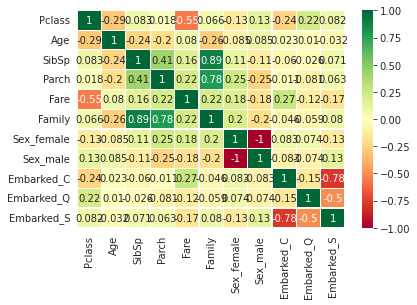

In [ ]:
#do another heatmap on the features of X to see correlations
sns.heatmap(X.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig.set_size_inches(20,12)
plt.show()
#Pclass and Fare 0.55 correlation
#Age no real correlation with any other correlations
#SibSp correlated with Family 0.89
#Parch correelated with Family 0.78
#Fare no real strong correlations
#Sex no real correlation outside of Female and Male
#Embarked no real correlations

#Step 5: Build the Baseline Model

Ideally, you will want to set a baseline algorithm to build off of. The most logical start is *linear regression* for *regression* and *logistic regression* for *classification*, as they are the basis for their respective algorithms.

Once you have the baseline set, you will want to choose an algorithm that surpasses the baseline.

Select a baseline model and fit it to your data.

**Note**: Use comments in your code and text blocks to explain your decisions and results.



In [ ]:
# Step 5a
#Splitting into my training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()
myTable = PrettyTable(["Data Set", "Shape"])
myTable.add_row(['X_train', X_train.shape])
myTable.add_row(['y_train', y_train.shape])
myTable.add_row(['X_test', X_test.shape])
myTable.add_row(['Y_test', y_test.shape])
print(myTable)
#X_train.shape,X_test.shape,y_train.shape,y_test.shape

+----------+-----------+
| Data Set |   Shape   |
+----------+-----------+
| X_train  | (623, 11) |
| y_train  |   (623,)  |
|  X_test  | (268, 11) |
|  Y_test  |   (268,)  |
+----------+-----------+


In [ ]:
# Step 5c
#Logistic Regression
log_reg_pipeline = Pipeline([
('imp_mean',SimpleImputer(missing_values=np.nan, strategy='mean')),
('scaler', StandardScaler()),
('norm', MinMaxScaler()),
('log_reg', LogisticRegression(random_state=11, solver='liblinear', penalty='l2'))])
log_reg_pipeline.fit(X_train, y_train)
train_accuracy_std = round(log_reg_pipeline.score(X_train, y_train),2)
train_accuracy_std = str (train_accuracy_std * 100.0) + "%"
#print(f"Logistic Regression Score of: {train_accuracy_std * 100.0} %")
myTable = PrettyTable(["Model Name", "Score"])
myTable.add_row(['Logisitc Regression', train_accuracy_std])
print(myTable)


+---------------------+-------+
|      Model Name     | Score |
+---------------------+-------+
| Logisitc Regression | 79.0% |
+---------------------+-------+


#Step 6: Evaluate the Baseline Model

Use cross-validation to calculate the appropriate model evaluation metric. 

Is your model doing a good job fitting the data?  

If you have ideas for how to improve your model fit, go back and make those changes to earlier steps.

**Note**: Use comments in your code and text blocks to explain your decisions and results.


In [ ]:
#Step 6a
#Looking at the Logistic Regression Accuracy
kfold = KFold(n_splits=6, random_state=11, shuffle=True)
results = cross_val_score(log_reg_pipeline, X_train, y_train, cv=kfold, scoring='accuracy')
score = round(results.mean(), 2) * 100.0
myTable = PrettyTable(["Model Name", "Accuracy", "Standard Deviation"])
myTable.add_row(['log_reg', score, round(results.std(),2)])
print(myTable)

+------------+----------+--------------------+
| Model Name | Accuracy | Standard Deviation |
+------------+----------+--------------------+
|  log_reg   |   78.0   |        0.03        |
+------------+----------+--------------------+


In [ ]:
# Step 6b
# logisitc Loss
kfold = KFold(n_splits=6, random_state=11, shuffle=True)
scoring = 'neg_log_loss'
results = cross_val_score(log_reg_pipeline, X_train, y_train, cv=kfold, scoring=scoring)
score = round(results.mean(), 2)
myTable = PrettyTable(["Model Name", "Logistic Loss", "Standard Deviation"])
myTable.add_row(['log_reg', score, round(results.std(),2)])
print(myTable)

+------------+---------------+--------------------+
| Model Name | Logistic Loss | Standard Deviation |
+------------+---------------+--------------------+
|  log_reg   |     -0.48     |        0.03        |
+------------+---------------+--------------------+


In [ ]:
# Step 6c
# Area under the curve
kfold = KFold(n_splits=6, random_state=11, shuffle=True)
scoring = 'roc_auc'
results = cross_val_score(log_reg_pipeline, X_train, y_train, cv=kfold, scoring=scoring)
score = round(results.mean(), 2)
myTable = PrettyTable(["Model Name", "AUC", "Standard Deviation"])
myTable.add_row(['log_reg', score, round(results.std(),2)])
print(myTable)

+------------+------+--------------------+
| Model Name | AUC  | Standard Deviation |
+------------+------+--------------------+
|  log_reg   | 0.84 |        0.03        |
+------------+------+--------------------+


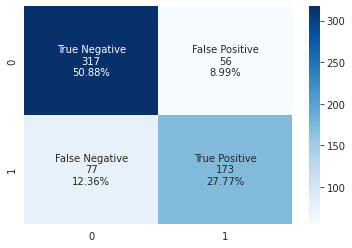

In [ ]:
# Step 6d
# Creating a confusion matrix
y_predict = log_reg_pipeline.predict(X_train)
matrix = confusion_matrix(y_train, y_predict)
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in
                matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     matrix.flatten()/np.sum(matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(matrix, annot=labels, fmt='', cmap='Blues')

In [ ]:
# Step 6e
# Tried using the out of the box function in Scikit learn but it would not render correcly so i made the below
clf_rep = precision_recall_fscore_support(y_train, y_predict)
#print(clf_rep)
report = {
             "precision" :clf_rep[0].round(2)
            ,"recall" : clf_rep[1].round(2)
            ,"f1-score" : clf_rep[2].round(2)
            ,"support" : clf_rep[3]
            }
report  = pd.DataFrame(report )
avg_tot = (report.apply(lambda x: round(x.mean(), 2) if x.name!="support" else  round(x.sum(), 2)).to_frame().T)
avg_tot.index = ["avg/total"]
report = report.append(avg_tot)
print(report)

           precision  recall  f1-score  support
0               0.80    0.85      0.83    373.0
1               0.76    0.69      0.72    250.0
avg/total       0.78    0.77      0.77    623.0


In [ ]:
#Run with l1 and Elastic Net Penalties and see if there is a differance
log_reg_pipeline = Pipeline([
('imp_mean',SimpleImputer(missing_values=np.nan, strategy='mean')),
('scaler', StandardScaler()),
('norm', MinMaxScaler()),
('log_reg', LogisticRegression(random_state=11, solver='liblinear', penalty='l1'))])
log_reg_pipeline.fit(X_train, y_train)
train_accuracy_std = round(log_reg_pipeline.score(X_train, y_train),2)
train_accuracy_std = str (train_accuracy_std * 100.0) + "%"
#print(f"Logistic Regression Score of: {train_accuracy_std * 100.0} %")
myTable = PrettyTable(["Model Name", "Score"])
myTable.add_row(['Logisitc Regression', train_accuracy_std])
print(myTable)

+---------------------+-------+
|      Model Name     | Score |
+---------------------+-------+
| Logisitc Regression | 78.0% |
+---------------------+-------+


# Step 7: Fit the Data to at Least One Other Model

Select one (or more) other appropriate model and use it to model the data. Calculate the cross-validation accuracy of each model. 

**Note**: Use comments in your code and text blocks to explain your decisions and results.

In [ ]:
#Step 7
models = []
results_train = []
models.append(('Logistic Regression', LogisticRegression(max_iter=10000)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('Random Forrest', RandomForestClassifier()))
models.append(('GB Boost', GradientBoostingClassifier()))
models.append(('Ada Boost', AdaBoostClassifier()))
models.append(('SGD', SGDClassifier()))
models.append(('XG', XGBClassifier(learning_rate=0.05, loss='deviance', max_depth=4,
              max_features=0.3, min_samples_leaf=100)))
names = []
scoring = 'accuracy'
myTable = PrettyTable(["Model Name", "Accuracy Score", "Accuracy Standard Deviation", "AUC"])

for name, model in models:
  kfold = KFold(n_splits=10, random_state=11, shuffle=True)
  model.fit(X_train, y_train)
  scores = cross_val_score(model, X_train, y_train, cv = kfold, scoring=scoring)
  auc = cross_val_score(model, X_train, y_train, cv = kfold, scoring='roc_auc')
  results_train.append(
      [name, scores.mean(), scores.std(),auc.mean()]
  )
  myTable.add_row([name, round(scores.mean() * 100.0,2),round(scores.std(),2), round(auc.mean() * 100.0,2)])


print(myTable)


+---------------------+----------------+-----------------------------+-------+
|      Model Name     | Accuracy Score | Accuracy Standard Deviation |  AUC  |
+---------------------+----------------+-----------------------------+-------+
| Logistic Regression |     78.02      |             0.03            | 83.68 |
|         KNN         |     73.05      |             0.04            | 77.55 |
|         CART        |     76.57      |             0.06            | 76.63 |
|          NB         |     77.05      |             0.05            | 82.16 |
|         SVM         |     65.65      |             0.07            | 73.48 |
|    Random Forrest   |     78.49      |             0.04            | 85.23 |
|       GB Boost      |     83.14      |             0.04            | 87.06 |
|      Ada Boost      |     78.81      |             0.03            | 84.01 |
|         SGD         |     71.26      |             0.08            | 69.88 |
|          XG         |     83.47      |            

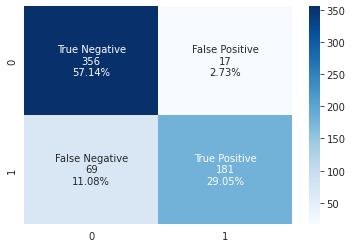

In [ ]:
#Confusion Matrix for XGBoost
XGbost = Pipeline([
('imp_mean',SimpleImputer(missing_values=np.nan, strategy='mean')),
('scaler', StandardScaler()),
('norm', MinMaxScaler()),
('XGB', XGBClassifier(learning_rate=0.05, loss='deviance', max_depth=4,
              max_features=0.3, min_samples_leaf=100))])
XGbost.fit(X_train, y_train)
y_predict = XGbost.predict(X_train)
matrix = confusion_matrix(y_train, y_predict)
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in
                matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     matrix.flatten()/np.sum(matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(matrix, annot=labels, fmt='', cmap='Blues')

In [ ]:
#hyper tune XGBoost
model = XGBClassifier()
param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300,400],
              'learning_rate': [0.1, 0.05, 0.01,0.001],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.2,0.1] 
              }

modelf = GridSearchCV(model,param_grid = param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

modelf.fit(X_train,y_train)
# Best score
print(f"Best Score: {modelf.best_score_}")

# Best Estimator
print(f"Best Estimator: {modelf.best_estimator_}")

Fitting 10 folds for each of 192 candidates, totalling 1920 fits
Best Score: 0.8346646185355862
Best Estimator: XGBClassifier(learning_rate=0.05, loss='deviance', max_depth=4,
              max_features=0.3, min_samples_leaf=100)


# Step 8: Evaluate Your Best Model

Evaluate your best model using the test set. 

*   Which model fit the data best?
*   What was the best accuracy you were able to achieve?  

**Note**: Use comments in your code and text blocks to explain your decisions and results.

In [ ]:
# Step 8
models = []
results_test = []
models.append(('Logistic Regression', LogisticRegression(max_iter=10000)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('Random Forrest', RandomForestClassifier()))
models.append(('GB Boost', GradientBoostingClassifier()))
models.append(('Ada Boost', AdaBoostClassifier()))
models.append(('SGD', SGDClassifier()))
models.append(('XG', XGBClassifier(learning_rate=0.05, loss='deviance', max_depth=4,
              max_features=0.3, min_samples_leaf=100)))
names = []
scoring = 'accuracy'
myTable = PrettyTable(["Model Name", "Accuracy Score", "Accuracy Standard Deviation", "AUC"])

for name, model in models:
  kfold = KFold(n_splits=10, random_state=11, shuffle=True)
  scores = cross_val_score(model, X_test, y_test, cv = kfold, scoring=scoring)
  auc = cross_val_score(model, X_test, y_test, cv = kfold, scoring='roc_auc')
  results_test.append(
      [name, scores.mean(), scores.std(),auc.mean()]
  )
  myTable.add_row([name, round(scores.mean() * 100.0,2),round(scores.std(),2), round(auc.mean() * 100.0,2)])


print(myTable)


+---------------------+----------------+-----------------------------+-------+
|      Model Name     | Accuracy Score | Accuracy Standard Deviation |  AUC  |
+---------------------+----------------+-----------------------------+-------+
| Logistic Regression |      83.5      |             0.07            | 86.55 |
|         KNN         |     70.88      |             0.11            | 74.41 |
|         CART        |     79.43      |             0.07            | 78.77 |
|          NB         |     82.42      |             0.05            | 84.71 |
|         SVM         |     72.01      |             0.07            | 78.93 |
|    Random Forrest   |     80.95      |             0.08            | 86.65 |
|       GB Boost      |     82.45      |             0.07            | 87.44 |
|      Ada Boost      |     80.14      |             0.09            |  84.3 |
|         SGD         |     72.32      |             0.08            | 79.17 |
|          XG         |     83.55      |            

In [ ]:
from pandas.core.arrays import datetimes
from pandas.core.indexes.datetimes import date
df_train = pd.DataFrame(data=results_train, columns=['Model Name', 'Accuracy Score', 'Accuracy Standard Deviation', 'AUC'])
df_test = pd.DataFrame(data=results_test, columns=['Model Name', 'Accuracy Score', 'Accuracy Standard Deviation', 'AUC'])
file_name = 'Titanic_training_data_results.'
date_time = datetime.now().strftime("%Y_%m_%d")
file_name = file_name + str(date_time) + '.xlsx'
# saving the excel
with pd.ExcelWriter(file_name) as writer:  
     df_train.to_excel(writer, sheet_name='Training Data')
     df_test.to_excel(writer, sheet_name='Testing Data')





#Step 9: Final Reporting

Summarize your model building process:  
* How did you identify the model target and features?  
* What steps did you take to prepare the data for modeling?  
* Which baseline model did you choose and why? How did you evaluate the model's performance?  
* Which other model(s) did you choose and why? How did you evaluate the model's performace?  
* What was the best model you developed? How well did the model perform on the test data?

#Step 9:


*   I indentified the target by understanding this is a classification exerceise in ML, and I was interested in indentifiying who survived the Titanic sinking.
*   I identified the features, by runing some descriptive statisticss on the columns in the data set, as well as visualizations of the data to help me identify which features correlated well with my target (survival).
* The baseline model I chose was logistic regression.  This was a classification problem.  Since I was trying to predict, with a high accuracy, if a passanger survived (O or 1 labels), I started with Logisitic Regression. I evaluated the model, by checking the accuracy of the model with Cross Validation, I also looked the confusion matrix, and measured the precision and recall score. 
* I tried K Nearest Neighbor, Naive Bayes, SVC, Decisions Trees, Random Forrest, Gradient Boos, XGBOOST. On the training data, I found XGBOOST to be the most accurate.  Based on the cross validation score with Cross Val, as well looking at the confusion matrix.
* XGBOOST was the clear winner on the accuracy.  On Step 7, I created a table that lists out the accuracy of each of the models I ran on the training.  On Step 8, I did the same for Test Data.  In both cases (Training and  Test), the scores were around 83.5 %.  The area under the curve was the alsot the highest for both training and test.  I then hypertuned the XGBOOST, to increase the accuracy as much as possiable. 

